# clustering trial

## imports:

In [ ]:
# Install a conda package in the current Jupyter kernel
import sys
#!conda install --yes --prefix {sys.prefix} numpy
#!conda install --yes --prefix {sys.prefix} pandas
#!conda install --yes --prefix {sys.prefix} matplotlib
#!conda install --yes --prefix {sys.prefix} seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
#from sklearn.cluster import KMeans

%matplotlib inline

## file loading:

In [ ]:
dfb = pd.read_csv('FN-DS-Base.csv')
dfc = pd.read_csv('FN-DS-Class.csv')
dfcq = pd.read_csv('FN-DS-Class-Quant.csv')
dfcqs = pd.read_csv('FN-DS-Class-Quant-Spacy.csv')
dfcqa = pd.read_csv('FN-DS-Class-Quant-AffectBR.csv')

## showing DS

In [ ]:
dfcq

## plotting unknow dfb data

In [ ]:
sb.pairplot(dfb)

## plotting master known dfb class data (Fake/True News)

In [ ]:
sb.pairplot(dfb, hue='alternativeName')

## plotting unknow dfc data (too large view)

In [ ]:
sb.pairplot(dfc)

## plotting master known dfb class data (Fake/True News - too large view also)

In [ ]:
sb.pairplot(dfc, hue='CLASSE')

## plotting unknow dfcq data (first slice)

In [ ]:
sb.pairplot(dfcq)

## plotting master known dfcq data (first slice)

In [ ]:
sb.pairplot(dfcq, hue='CLASSE')

## plotting unknown dfcqs data (too large view yet)

In [ ]:
sb.pairplot(dfcqs)

## plotting master known dfcqs data (slice)

In [ ]:
sb.pairplot(dfcqs, hue='CLASSE')

## plotting unknown dfcqa data (slice)

In [ ]:
sb.pairplot(dfcqa)

## plotting master known dfcqa data (slice)

In [ ]:
sb.pairplot(dfcqa, hue='CLASSE')

# KMeans trial over first slice

### dettaching only the features of dfcq

In [ ]:
dfcq

In [ ]:
dfcqX = dfcq.drop('ID', axis=1)
dfcqX = dfcqX.drop('CLASSE', axis=1)

#X = np.array(dfcqX.drop('CLASSE', axis=1))

In [ ]:
dfcqX

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5, random_state=0)

In [ ]:
km.fit(dfcqX)

In [ ]:
km.labels_

In [ ]:
dfcq['km_classes'] = km.labels_

In [ ]:
dfcq

In [ ]:
sb.pairplot(dfcq, hue='km_classes')

## C4.5 decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('FN-DS.csv')

In [ ]:
df.info()

### train/test

In [ ]:
dfX = df.drop(['id', 'texto', 'url', 'autor', 'data', 'titulo', 'classe', 'categoria'], axis=1)

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfX['categoria_e'] = le.fit_transform(df['categoria'])
#dfX = dfX.drop(['categoria_e'], axis=1)
#dfX['categoria'] = df['categoria']
dfX

,POL_ABSOLUTA,MAIUSCULAS,EXCLAMACAO,ASPAS,ADJ,ADP,ADV,AUX,CONJ,CCONJ,...,VERB,X,EOL,affect,posemo,negemo,anx,anger,sad,categoria
0,-0.157895,0.539248,0.000000,0.000000,0.353659,0.043360,0.274616,0.144535,0,0.000000,...,0.372779,0.000000,0,0.366709,0.110546,0.387865,0.000000,0.000000,0.000000,Política
1,-0.157895,0.525129,0.000000,0.000000,0.265493,0.000000,0.107042,0.225352,0,0.000000,...,0.301095,0.000000,0,0.442231,0.231076,0.405378,0.000000,0.000000,0.000000,Política
2,-0.210526,0.563293,0.000000,0.000000,0.243697,0.057623,0.228091,0.528211,0,0.000000,...,0.401227,0.000000,0,0.262057,0.073356,0.280776,0.000000,0.123946,0.065767,Educação
3,-0.210526,0.442693,0.000000,0.000000,0.191247,0.000000,0.364508,0.575540,0,0.000000,...,0.385292,0.000000,0,0.317492,0.000000,0.396865,0.000000,0.242574,0.064356,Tecnologia
4,-0.210526,0.655377,0.000000,0.000000,0.130631,0.345946,0.205405,0.144144,0,0.000000,...,0.310310,0.000000,0,0.211429,0.112987,0.192208,0.090909,0.000000,0.000000,Segurança
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.105263,0.470511,0.000000,0.155809,0.347335,0.032389,0.410256,0.161943,0,0.000000,...,0.415954,0.000000,0,0.250141,0.149765,0.217136,0.000000,0.000000,0.036620,Outros
596,-0.263158,0.569041,0.000000,0.000000,0.255796,0.048387,0.268145,0.161290,0,0.311996,...,0.424731,0.054123,0,0.201722,0.187231,0.132712,0.000000,0.105452,0.000000,Política
597,-0.236842,0.324771,0.000000,0.000000,0.372143,0.107906,0.142375,0.119895,0,0.000000,...,0.282420,0.080464,0,0.225969,0.234865,0.132634,0.000000,0.000000,0.010356,Economia
598,-0.052632,0.712818,0.000000,0.000000,0.197856,0.093567,0.370370,0.155945,0,0.000000,...,0.213992,0.000000,0,0.210826,0.165242,0.158120,0.000000,0.069801,0.000000,Política


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfX, df['classe'], test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2)
#dtc = DecisionTreeRegressor()

In [ ]:
dtc = dtc.fit(X_train, y_train)

### showing most important features

In [ ]:
dtc.feature_importances_

In [ ]:
for caracteristica, importancia in zip(dfX.columns, dtc.feature_importances_):
    print("{}:{}".format(caracteristica, importancia))

In [ ]:
resultado = dtc.predict(X_test)
resultado

### seeing tree performance

In [ ]:
print(metrics.classification_report(y_test, resultado))

### plotting tree graph

In [ ]:
## Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} ipywidgets
##!conda install --yes --prefix {sys.prefix} graphviz
#!conda install --yes --prefix {sys.prefix} python-graphviz
#!conda install --yes --prefix {sys.prefix} pydot
#!conda install --yes --prefix {sys.prefix} iPython

In [ ]:
import pydot
import graphviz

In [ ]:
dot_data = export_graphviz(
    dtc, 
    out_file=None, 
    max_depth=None, 
    feature_names=dfX.columns, 
    class_names=['fake', 'true'], 
    label='all', 
    filled=True, 
    leaves_parallel=False, 
    impurity=True, 
    node_ids=True, 
    proportion=True, 
    rotate=False, 
    rounded=True, 
    special_characters=False, 
    precision=3
)
graph = graphviz.Source(dot_data)
graph

### interative tree rendering

In [ ]:
from ipywidgets import interactive
from graphviz import Source
#from ipython.display import SVG, display
import ipython

In [131]:
dfX

,POL_ABSOLUTA,MAIUSCULAS,EXCLAMACAO,ASPAS,ADJ,ADP,ADV,AUX,CONJ,CCONJ,...,VERB,X,EOL,affect,posemo,negemo,anx,anger,sad,categoria_e
0,-0.157895,0.539248,0.000000,0.000000,0.353659,0.043360,0.274616,0.144535,0,0.000000,...,0.372779,0.000000,0,0.366709,0.110546,0.387865,0.000000,0.000000,0.000000,3
1,-0.157895,0.525129,0.000000,0.000000,0.265493,0.000000,0.107042,0.225352,0,0.000000,...,0.301095,0.000000,0,0.442231,0.231076,0.405378,0.000000,0.000000,0.000000,3
2,-0.210526,0.563293,0.000000,0.000000,0.243697,0.057623,0.228091,0.528211,0,0.000000,...,0.401227,0.000000,0,0.262057,0.073356,0.280776,0.000000,0.123946,0.065767,1
3,-0.210526,0.442693,0.000000,0.000000,0.191247,0.000000,0.364508,0.575540,0,0.000000,...,0.385292,0.000000,0,0.317492,0.000000,0.396865,0.000000,0.242574,0.064356,6
4,-0.210526,0.655377,0.000000,0.000000,0.130631,0.345946,0.205405,0.144144,0,0.000000,...,0.310310,0.000000,0,0.211429,0.112987,0.192208,0.090909,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.105263,0.470511,0.000000,0.155809,0.347335,0.032389,0.410256,0.161943,0,0.000000,...,0.415954,0.000000,0,0.250141,0.149765,0.217136,0.000000,0.000000,0.036620,2
596,-0.263158,0.569041,0.000000,0.000000,0.255796,0.048387,0.268145,0.161290,0,0.311996,...,0.424731,0.054123,0,0.201722,0.187231,0.132712,0.000000,0.105452,0.000000,3
597,-0.236842,0.324771,0.000000,0.000000,0.372143,0.107906,0.142375,0.119895,0,0.000000,...,0.282420,0.080464,0,0.225969,0.234865,0.132634,0.000000,0.000000,0.010356,0
598,-0.052632,0.712818,0.000000,0.000000,0.197856,0.093567,0.370370,0.155945,0,0.000000,...,0.213992,0.000000,0,0.210826,0.165242,0.158120,0.000000,0.069801,0.000000,3


/home/black/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/black/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/black/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/black/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/black/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warning

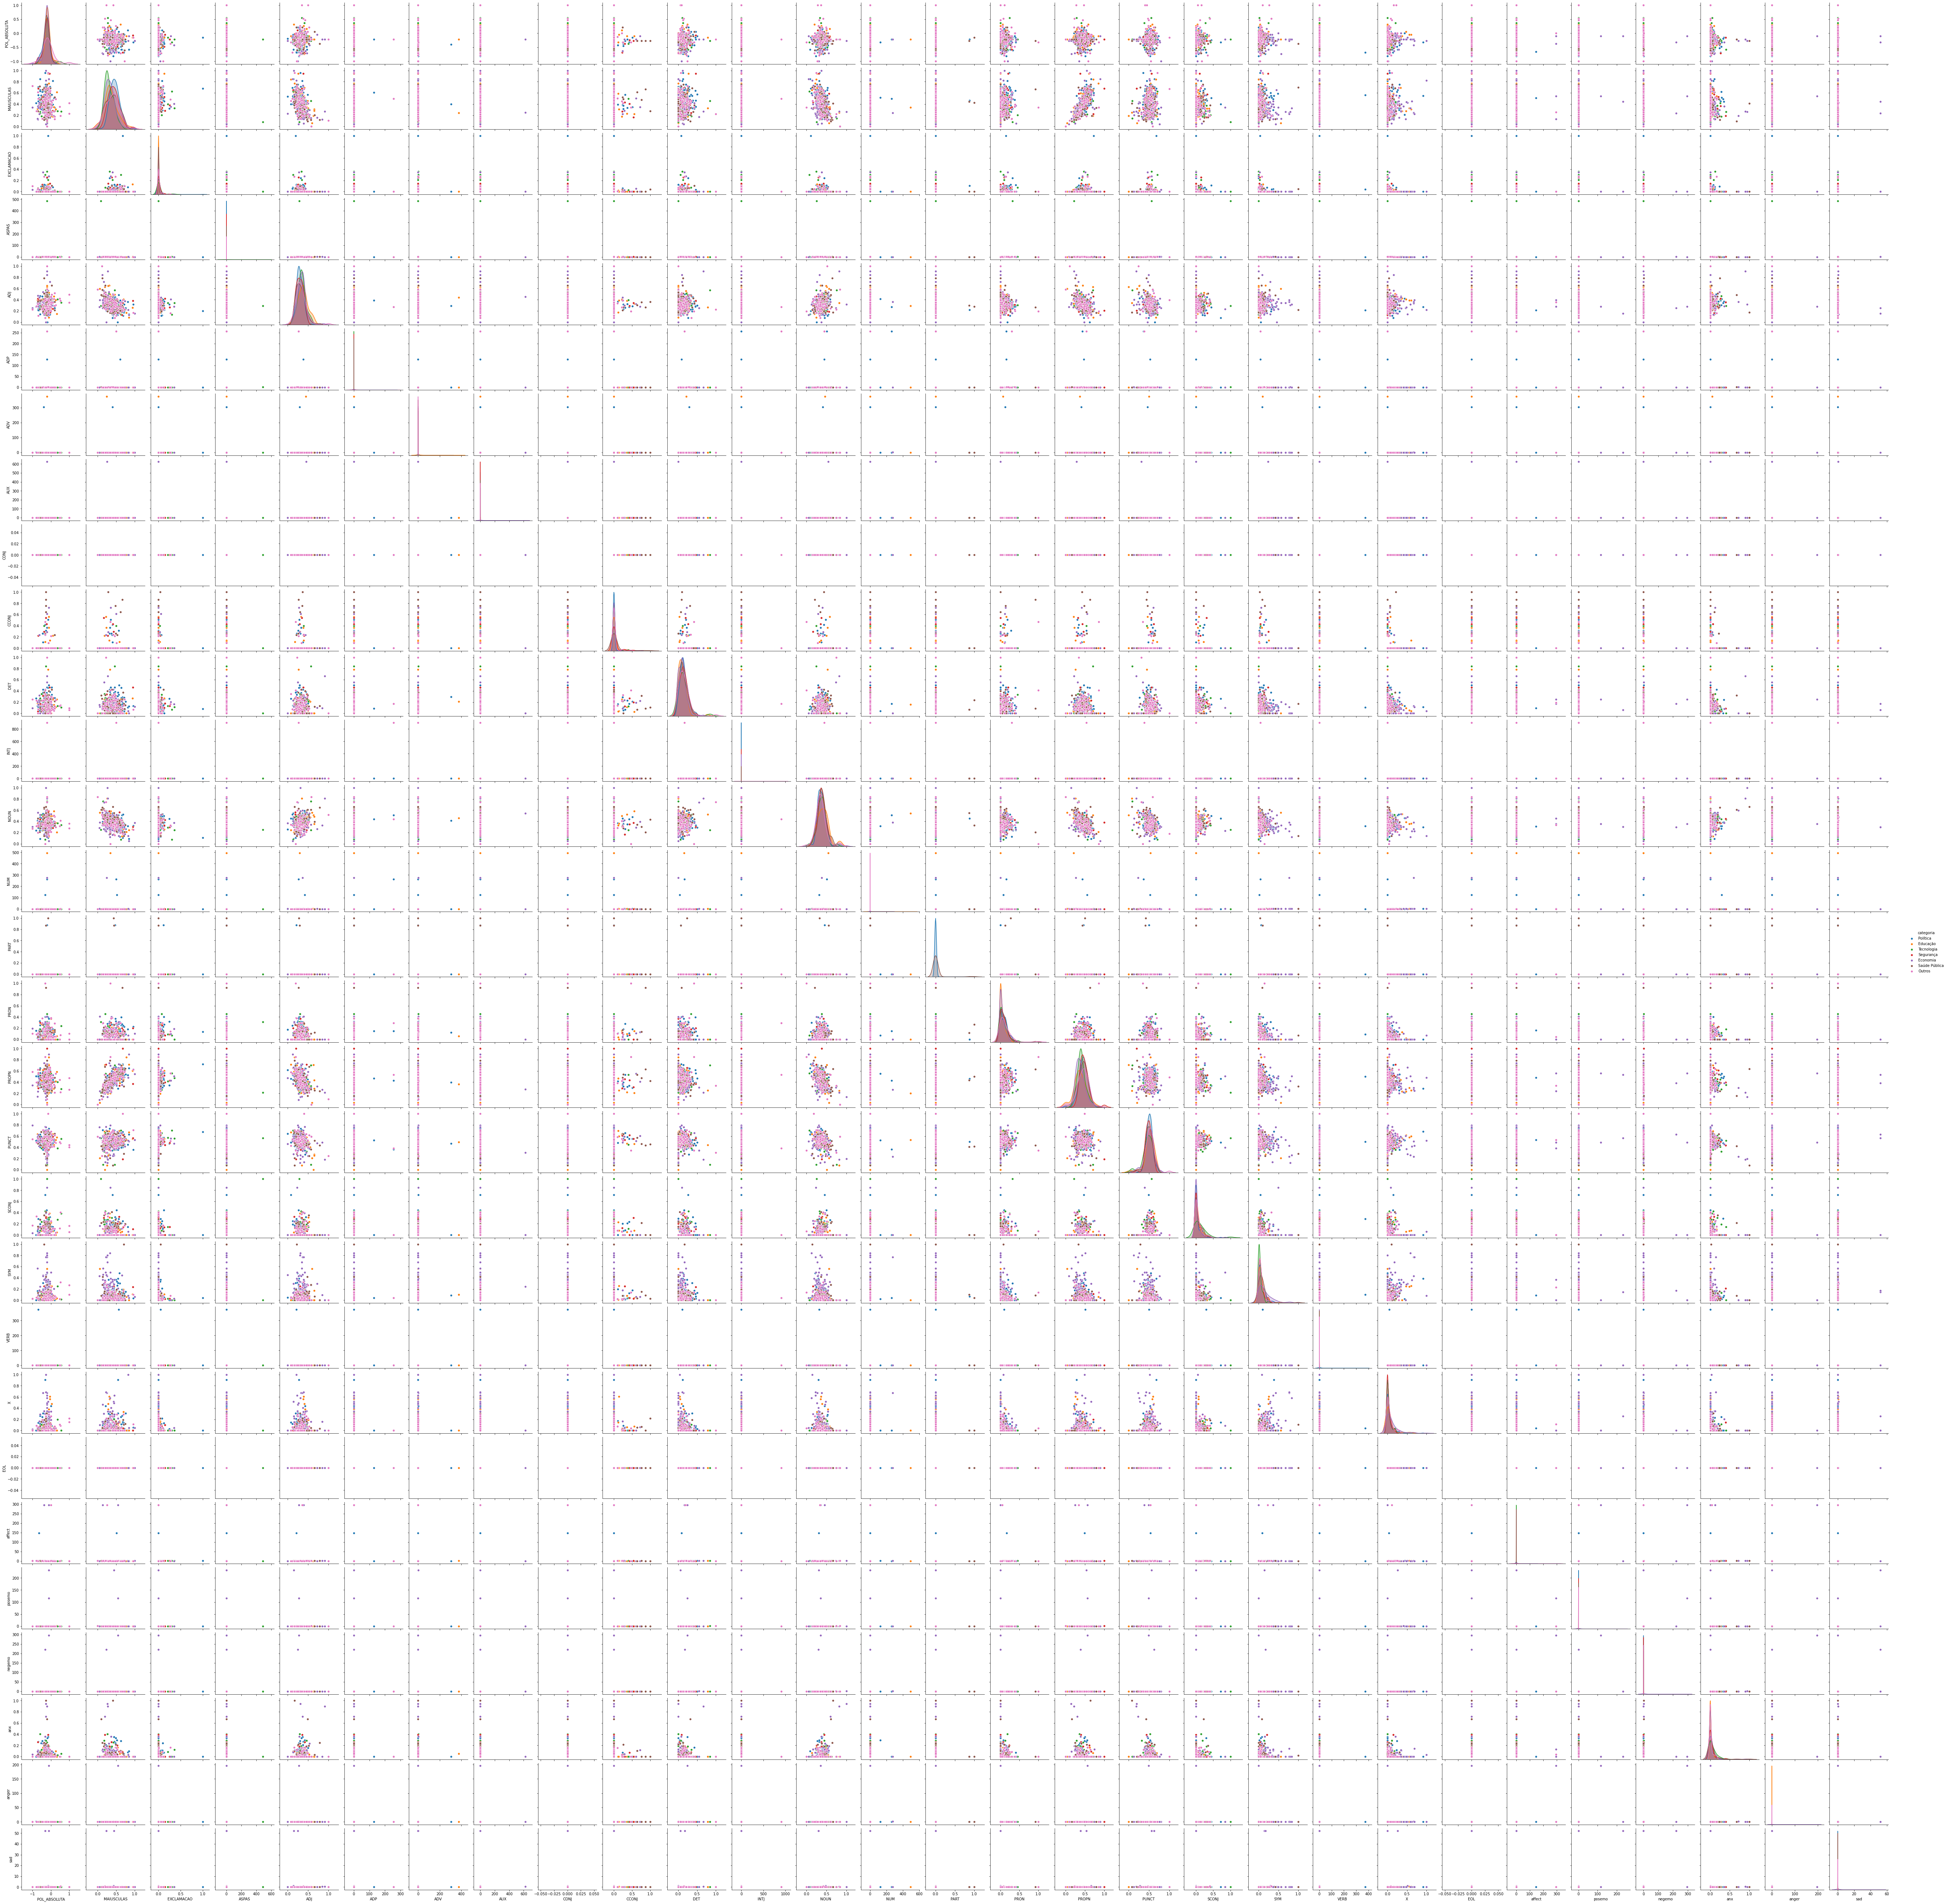

In [140]:
#sb.pairplot(dfX, hue='categoria_e')
sb.pairplot(dfX, hue='categoria')

In [ ]:
#sb.pairplot(dfcqX)